7. Perform Feature Engineering towards building new feature which is more impactful. Build machine learning
model/s to predict the price of the car based on other given features like Brand, Model, Year, Fuel Type etc

   Car_ID    Brand    Model  Year  Kilometers_Driven Fuel_Type Transmission  \
0       1   Toyota  Corolla  2018              50000    Petrol       Manual   
1       2    Honda    Civic  2019              40000    Petrol    Automatic   
2       3     Ford  Mustang  2017              20000    Petrol    Automatic   
3       4   Maruti    Swift  2020              30000    Diesel       Manual   
4       5  Hyundai   Sonata  2016              60000    Diesel    Automatic   

  Owner_Type  Mileage  Engine  Power  Seats    Price  
0      First       15    1498    108      5   800000  
1     Second       17    1597    140      5  1000000  
2      First       10    4951    395      4  2500000  
3      Third       23    1248     74      5   600000  
4     Second       18    1999    194      5   850000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----

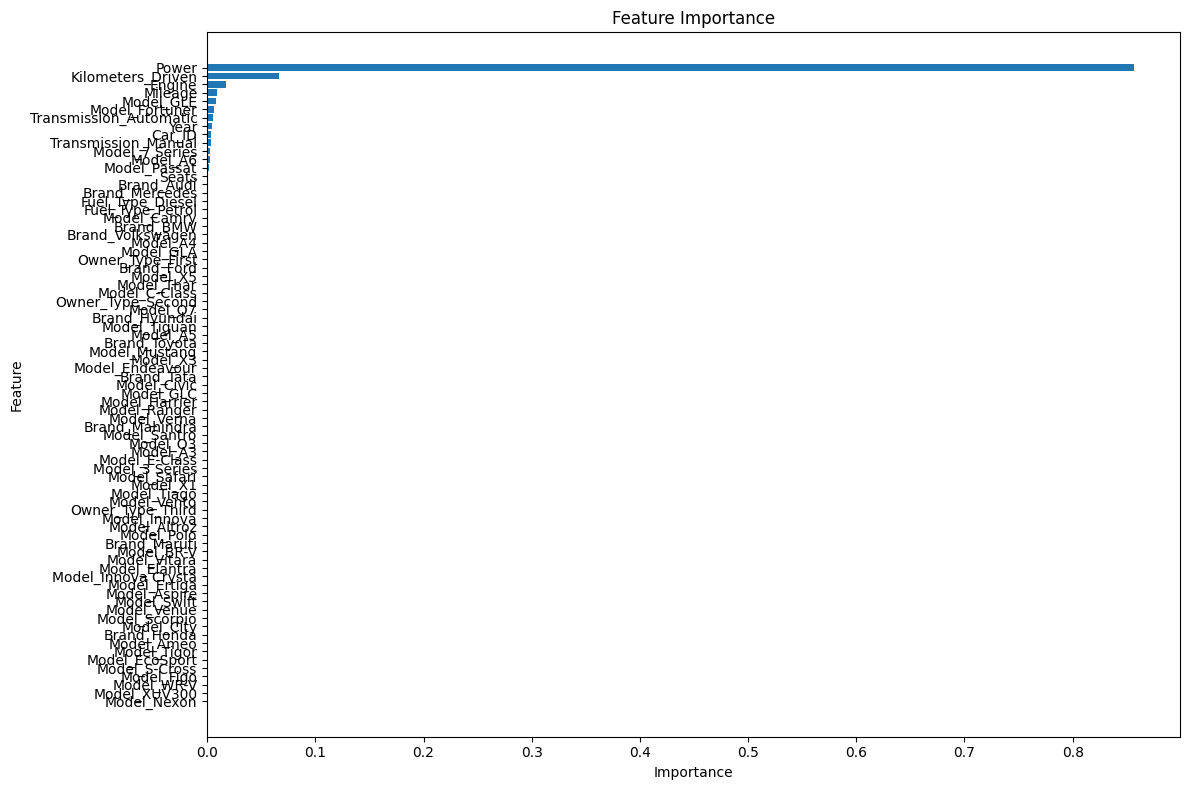

In [7]:
# Load your dataset here. Replace 'your_dataset.csv' with the path to your file.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/cars.csv')

# Step 1: Display first few rows of the dataset
print(data.head())

# Define features (X) and target (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the regressor model
regressor = RandomForestRegressor(random_state=42)

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', regressor)])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Show dataset after cleaning and feature engineering (Note: Preprocessing happens within the pipeline)
print(data.info())
print(data.describe())

# Step 3: After Train-Test split, check shapes
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Step 4: Model Training Output
pipeline.fit(X_train, y_train)
print("Pipeline trained successfully!")

# Step 5: Training Performance
y_train_pred = pipeline.predict(X_train)
print("Training R-squared:", r2_score(y_train, y_train_pred))
print("Training Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))

# Step 6: Testing Performance
y_test_pred = pipeline.predict(X_test)
print("Test R-squared:", r2_score(y_test, y_test_pred))
print("Test Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))

# Step 7: Feature Importance Visualization

# Get feature names after preprocessing
# This part gets the feature names generated by the one-hot encoder
onehot_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
# Combine numerical and one-hot encoded feature names
feature_names = list(numerical_features) + list(onehot_features)

# Get importances from the trained model
regressor_model = pipeline.named_steps['regressor'] # Renamed to avoid conflict with regressor variable
if hasattr(regressor_model, 'feature_importances_'):
    importances = regressor_model.feature_importances_
elif hasattr(regressor_model, 'coef_'):
    # For models like LinearRegression, use absolute coefficients
    importances = abs(regressor_model.coef_)
else:
    print("Regressor does not have feature_importances_ or coef_ attribute.")
    importances = None

if importances is not None:
    # Sort features by importance
    sorted_idx = importances.argsort()[::-1]
    sorted_importances = importances[sorted_idx]
    sorted_feature_names = [feature_names[i] for i in sorted_idx]

    plt.figure(figsize=(12, 8))
    plt.barh(sorted_feature_names, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance')
    plt.gca().invert_yaxis() # Display highest importance at the top
    plt.tight_layout()
    plt.show()
else:
    print("Could not determine feature importances for the selected regressor.")